In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Problem 1

In [2]:
train = pd.read_csv("train1.csv", index_col = "Id")
test = pd.read_csv("test1.csv", index_col = "Id")

In [3]:
X_train = train.iloc[:,:79]
y_train = train.iloc[:,79:]
X_test = test.iloc[:,:79]
y_test = test.iloc[:,79:]

In [4]:
clf = make_pipeline(OneHotEncoder(handle_unknown='ignore') ,LinearSVC(C=0.01, penalty="l2", dual=False, max_iter = 1000))
clf.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('linearsvc', LinearSVC(C=0.01, dual=False))])

In [5]:
y_pred = clf.predict(X_test)

In [6]:
mean_squared_error(y_test, y_pred, squared=False)

67444.2725850821

<AxesSubplot:xlabel='true', ylabel='pred'>

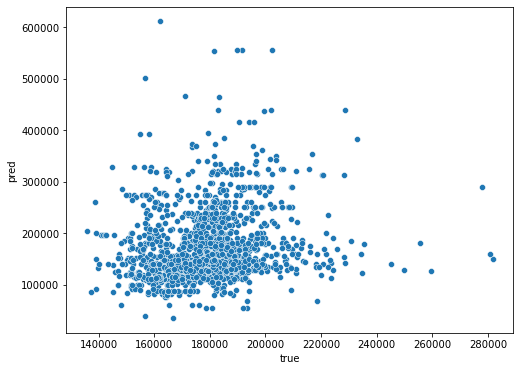

In [7]:
plt.figure(figsize = (8,6))
out = pd.DataFrame(data = {"true":np.ravel(y_test), "pred":y_pred})
sns.scatterplot(x = "true", y = "pred", data = out)

In [8]:
clf = make_pipeline(OneHotEncoder(handle_unknown='ignore') , DecisionTreeRegressor(max_features = 10))
clf.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_features=10))])

In [9]:
y_pred = clf.predict(X_test)

In [10]:
mean_squared_error(y_test, y_pred, squared=False)

75477.87745487913

<AxesSubplot:xlabel='true', ylabel='pred'>

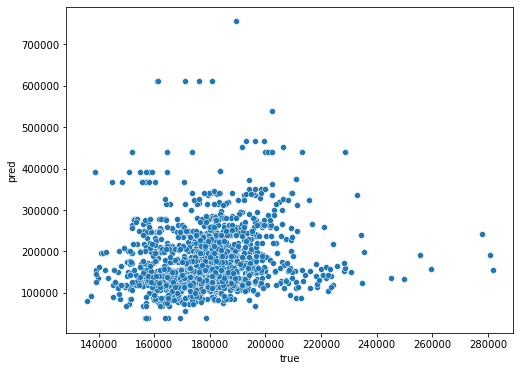

In [11]:
plt.figure(figsize = (8,6))
out = pd.DataFrame(data = {"true":np.ravel(y_test), "pred":y_pred})
sns.scatterplot(x = "true", y = "pred", data = out)

In [12]:
clf = make_pipeline(OneHotEncoder(handle_unknown='ignore') , RandomForestRegressor(max_features = 10))
clf.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=10))])

In [13]:
y_pred = clf.predict(X_test)

In [14]:
mean_squared_error(y_test, y_pred, squared=False)

49277.047616828866

<AxesSubplot:xlabel='true', ylabel='pred'>

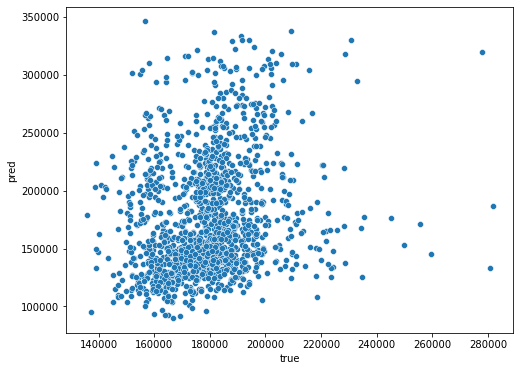

In [15]:
plt.figure(figsize = (8,6))
out = pd.DataFrame(data = {"true":np.ravel(y_test), "pred":y_pred})
sns.scatterplot(x = "true", y = "pred", data = out)

In [16]:
clf = make_pipeline(OneHotEncoder(handle_unknown='ignore') , xgb.XGBRegressor(n_estimators=1000, max_depth=6, eta=0.03, subsample=1, colsample_bytree=1, n_jobs = -1))
clf.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eta=0.03,
                              eval_metric=None, feature_types=None, gamma=0,
                              gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.0299999993, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=1000,
                

In [17]:
y_pred = clf.predict(X_test)

In [18]:
mean_squared_error(y_test, y_pred, squared=False)

74818.74364636105

<AxesSubplot:xlabel='true', ylabel='pred'>

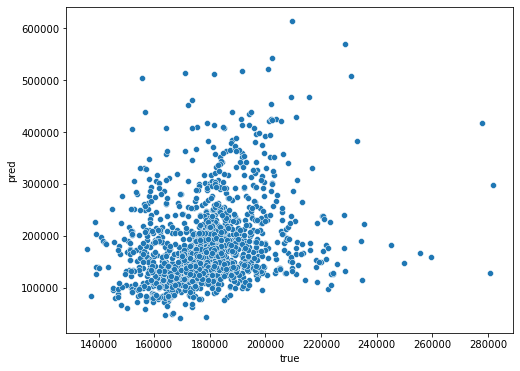

In [19]:
plt.figure(figsize = (8,6))
out = pd.DataFrame(data = {"true":np.ravel(y_test), "pred":y_pred})
sns.scatterplot(x = "true", y = "pred", data = out)

Parameters tuned for XGBoost are in the code.  
Good overall fit minus the outliers. The overal general trend of the dataset is preserved in each of the models. It seems like outliers in Random Forest are less drastic which leads to a better RMSE Score but removing outlier points could increase the score.

# Problem 2

In [20]:
pkm = pd.read_csv("pokemon.csv", index_col = "Number")

In [21]:
X = pkm.iloc[:,2:22]
y = pkm.iloc[:,1:2]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [23]:
clf = make_pipeline(OneHotEncoder(handle_unknown='ignore') , DecisionTreeClassifier())
clf.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=y_train.Type_1.unique()))

[[16  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  3  1  0  0  0  4  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  4  0  1  0  1  0  0  0  0  0  0  0  0  1  0  1]
 [ 0  0  1  2  1  0  1  0  0  0  1  0  0  0  0  1  0  0]
 [ 0  0  0  1  2  0  1  0  0  0  0  0  1  0  1  1  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  1  0  3  1  2  1  0  0]
 [ 0  0  0  1  0  0  9  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  2  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0  0  0  0  2  0  3  1  0  1  0  1]
 [ 0  0  0  0  2  0  0  0  0  0  0  1  1  0  1  0  0  0]
 [ 0  0  2  3  2  0  2  0  0  0  0  2 16  2  3  0  1  2]
 [ 2  0  1  1  0  0  0  0  0  0  0  0  1  3  3  1  0  0]
 [ 0  1  0  1  0  0  0  1  0  0  0  0  1  2  2  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  2  0  0  3  2  1]
 [ 0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  2  3  0]
 [ 0  0  0  1  0  0  1  0  0  0

In [26]:
clf = make_pipeline(OneHotEncoder(handle_unknown='ignore') , RandomForestClassifier())
clf.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('randomforestclassifier', RandomForestClassifier())])

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=y_train.Type_1.unique()))

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  4  0  0  0  0  0  3  0  1  0  0  0]
 [ 0  0  3  0  0  0  1  0  0  0  0  0  1  0  0  0  0  3]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  1  0  0  1  0  1]
 [ 0  0  0  0  3  1  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  1  0  0  3  0  2  0  0  2]
 [ 0  0  0  1  0  0  8  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  1  0  4  0  0  0  2  1]
 [ 0  0  0  1  0  0  0  0  0  1  0  0  1  0  0  0  0  2]
 [ 0  0  0  2  0  0  3  0  0  0  0  0 24  0  1  0  0  5]
 [ 2  0  0  0  0  0  0  0  2  0  0  0  2  2  2  1  0  1]
 [ 0  0  0  0  0  0  1  0  1  0  0  0  2  0  6  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  3  0  4]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  2  3  1]
 [ 0  0  0  0  0  0  0  0  0  0

C:\Users\matth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
le = LabelEncoder()
y_train_x = le.fit_transform(np.ravel(y_train))
y_test_x = le.fit_transform(np.ravel(y_test))

In [30]:
clf = make_pipeline(OneHotEncoder(handle_unknown='ignore'), xgb.XGBClassifier(n_estimators=1000, max_depth=6, eta=0.03, subsample=1, colsample_bytree=1, n_jobs = -1))
clf.fit(X_train, y_train_x)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.03,
                               eval_metric=None, feature_types=None, gamma=0,
                               gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.0299999993, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=1000,
   

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print(confusion_matrix(y_test_x, y_pred))
print(classification_report(y_test_x, y_pred, target_names=y_train.Type_1.unique()))

[[16  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  1  0  0  1  1  0  0  0  0  0  2  1  0  0  0  1]
 [ 0  1  5  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  3  0  1  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  1  0  1  0  2  0  0  0]
 [ 0  0  0  2  0  0  8  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  2  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 3  0  0  1  0  0  0  0  0  1  0  0  3  0  0  0  2  1]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  2  0]
 [ 0  1  0  4  0  0  2  0  0  0  1  1 19  5  0  0  0  2]
 [ 2  0  1  0  0  0  0  0  1  0  0  2  0  4  1  1  0  0]
 [ 1  0  0  2  0  0  0  0  0  1  1  1  1  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  4  0  4]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  2  3  0]
 [ 0  0  0  0  0  0  0  1  0  0

Model Performance is poor as there arent enough samples to train on. Some types are much rarer than others. Since a lot of pokemon overlap with their features, it is hard to accurately predict each pokemon's type. TSNE Below shows no Clustering so effectively there is no way to accuratly classify this data.

In [33]:
from sklearn.manifold import TSNE

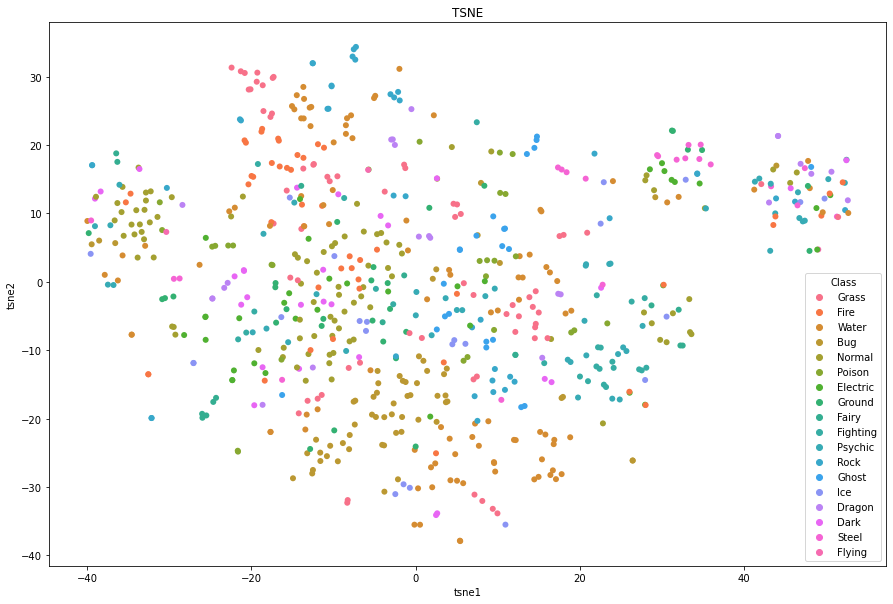

In [34]:
plt.figure(figsize = (15,10))
enc = OneHotEncoder(handle_unknown='ignore')
X_oh = enc.fit_transform(X)
X_embedded = TSNE(n_components=2, n_jobs = -1, random_state = 101).fit_transform(X_oh)

tsne_fit = pd.DataFrame(data = {"tsne1":X_embedded[:,0], "tsne2":X_embedded[:,1],"Class":np.ravel(y.values)})
plot = sns.scatterplot(x='tsne1', y='tsne2', data=tsne_fit, hue='Class', ec=None).set(title='TSNE')
plt.savefig("TSNE.jpg", dpi = 600)
plt.show()